# UrbanSoundsClassification: AIYard

Model.ipynb

AIYard ekibi

### 1. Kütüphanelerin içe aktarılması

In [90]:
import os
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn

### 2. Önişlenmiş verisetlerinin içe aktarılması
Önişleme defterini kullanarak `preproc` klasörü altında oluşturduğumuz `train`, `val` ve `test` klasörlerindeki spektrogramları okuyup demetler halinde kaydederek başlıyoruz.

Google Colab ortamında isek Google Drive'ı mount ettikten sonra `preproc` klasörüne giden yolu tutan `preproc_folder`'ı değiştirmeliyiz.

In [3]:
from google.colab import drive
drive.mount('/content/GDrive/')

Mounted at /content/GDrive/


Lokal cihazımda önişleyip shuffle ederek oluşturduğum spektrogramlara https://drive.google.com/file/d/133_6nrhE7261WkFMjbHxAQSGWa7z0Mmq/view?usp=sharing linkinden erişebilirsiniz. Burada Google Drive'dan session hafızasına alıp untar ediyoruz ve `preproc_folder` değişkenine `/content/preproc/` yolunu veriyoruz. 

In [62]:
!cp /content/GDrive/MyDrive/preproc.tar /content
!tar -xf preproc.tar

In [6]:
# DİKKAT: Yolun sonuna "/" karakteri eklemeyi unutma!
# /home/ferit/repos/UrbanSoundsClassification/preproc/
# /content/preproc/
preproc_folder = "/content/preproc/"

#### 2.0. Dosya okuma fonksiyonu
Spektrogramları okumak için argüman olarak klasörün yolunu alan ve geriye spektrogram ile sınıf numarasını dönen fonksiyon yazacağız.

In [63]:
def read_spectrograms(folder_path: str):
  X_list = []
  Y_list = []
  for path, subdirs, files in os.walk(folder_path):
    for name in files:
      file = os.path.join(path, name)
      X_list.append(np.load(file))
      Y_list.append(int(file.split('-')[2][0]))
  return np.array(X_list), np.array(Y_list)

#### 2.1. `train` klasöründeki spektrogramların okunması

X_train ve Y_train listelerini elde edeceğiz. Her iki listede 6900 tane eleman bulunmalı. 

X_train'e spektrogram verisi olan (64, 64) boyutlu NumPy dizilerini, Y_train'e ise karşılık gelen sınıfın numarasını ekleyeceğiz.

In [64]:
X_train, Y_train = read_spectrograms(f"{preproc_folder}train")
X_train.reshape(6900, 64, 64, 1)

array([[[[0.97647059],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.97647059],
         [0.07058824],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.97647059],
         [0.08627451],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.97647059],
         [0.33333333],
         [0.15294118],
         ...,
         [0.22745098],
         [0.3372549 ],
         [0.16078431]],

        [[0.97647059],
         [0.37254902],
         [0.25882353],
         ...,
         [0.21568627],
         [0.33333333],
         [0.37647059]],

        [[0.99607843],
         [0.97647059],
         [0.97647059],
         ...,
         [0.97647059],
         [0.97647059],
         [0.97647059]]],


       [[[0.97647059],
         [0.        ],
         [0.  

In [65]:
len(X_train) == len(Y_train) == 6900

True

Sınıf: 4


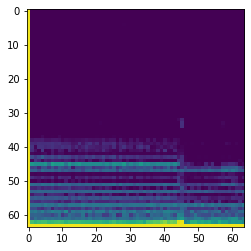

In [66]:
plt.imshow(X_train[1200])
print(f"Sınıf: {Y_train[1200]}")

#### 2.2. `val` klasöründeki spektrogramların okunması

X_val ve Y_val listelerini elde edeceğiz. Her iki listede 900 tane eleman bulunmalı.

In [67]:
X_val, Y_val = read_spectrograms(f"{preproc_folder}val")
X_val.reshape(900, 64, 64, 1)

array([[[[0.97647059],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.97647059],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.97647059],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.97647059],
         [0.62745098],
         [0.69019608],
         ...,
         [0.45490196],
         [0.54901961],
         [0.47058824]],

        [[0.97647059],
         [0.78823529],
         [0.64313725],
         ...,
         [0.80784314],
         [0.6       ],
         [0.76078431]],

        [[0.99607843],
         [0.97647059],
         [0.97647059],
         ...,
         [0.97647059],
         [0.97647059],
         [0.97647059]]],


       [[[0.97647059],
         [0.        ],
         [0.  

In [68]:
len(X_val) == len(Y_val) == 900

True

#### 2.3. `test` klasöründeki spektrogramların okunması

X_test ve Y_test listelerini elde edeceğiz. Her iki listede 935 tane eleman bulunmalı.

In [69]:
X_test, Y_test = read_spectrograms(f"{preproc_folder}test")

In [70]:
len(X_test) == len(Y_test) == 932

True

### 3. Nöral ağın oluşturulması

In [71]:
net = tf.keras.Sequential()

Konvülasyonel filtreleri ve pooling katmanlarını bağlıyoruz.

In [72]:
net.add(tf.keras.layers.Conv2D(64,
                               kernel_size = (3, 3),
                               strides = (1, 1),
                               padding = "same",
                               activation = "relu",
                               input_shape = (64, 64, 1)))

net.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

net.add(tf.keras.layers.Conv2D(128,
                               kernel_size = (5, 5),
                               strides = (1, 1),
                               padding = "same",
                               activation = "LeakyReLU"))

net.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

net.add(tf.keras.layers.Conv2D(128,
                               kernel_size = (3, 3),
                               strides = (1, 1),
                               padding = "same",
                               activation = "LeakyReLU"))

2D katmanları düzleştiriyor ve output katmanına doğru Dense katmanlar yerleştiriyoruz.

In [73]:
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(128, activation = "relu"))
net.add(tf.keras.layers.Dropout(0.5))
net.add(tf.keras.layers.Dense(64, activation = "relu"))
net.add(tf.keras.layers.Dropout(0.5))
net.add(tf.keras.layers.Dense(10, activation = "softmax"))

Ağı compile ediyoruz.

In [74]:
net.compile(optimizer = "adam",
            loss = "sparse_categorical_crossentropy", # sparse_categorical_crossentropy | categorical_crossentropy
            metrics = ["accuracy"]) 

Ağın yapısı:

In [75]:
net.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 128)       204928    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 flatten_1 (Flatten)         (None, 32768)            

### 4. Nöral ağın eğitilmesi

Epoch miktarını belirliyor ve nöral ağı eğitiyoruz.

In [76]:
epoch = 250

In [77]:
results = net.fit(X_train, Y_train,
                    epochs = epoch,
                    validation_data = (X_val, Y_val))

Epoch 1/250
216/216 [==============================] - 4s 14ms/step - loss: 1.8939 - accuracy: 0.3164 - val_loss: 1.2160 - val_accuracy: 0.5922
Epoch 2/250
216/216 [==============================] - 3s 13ms/step - loss: 1.3284 - accuracy: 0.5513 - val_loss: 0.9852 - val_accuracy: 0.6678
Epoch 3/250
216/216 [==============================] - 3s 13ms/step - loss: 1.0541 - accuracy: 0.6551 - val_loss: 0.7948 - val_accuracy: 0.7678
Epoch 4/250
216/216 [==============================] - 3s 13ms/step - loss: 0.8997 - accuracy: 0.7109 - val_loss: 0.7014 - val_accuracy: 0.7833
Epoch 5/250
216/216 [==============================] - 3s 13ms/step - loss: 0.7811 - accuracy: 0.7590 - val_loss: 0.6064 - val_accuracy: 0.8200
Epoch 6/250
216/216 [==============================] - 3s 14ms/step - loss: 0.6765 - accuracy: 0.7939 - val_loss: 0.6479 - val_accuracy: 0.7800
Epoch 7/250
216/216 [==============================] - 3s 13ms/step - loss: 0.6182 - accuracy: 0.8080 - val_loss: 0.5638 - val_accuracy:

### 5. Eğitim metrikleri ve yorumlanması

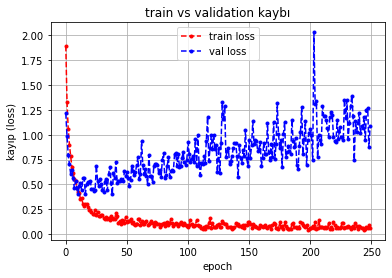

In [78]:
# Kayıp (loss) fonksiyonu grafiği
plt.plot(results.history["loss"], "r.--", label = "train loss")
plt.plot(results.history["val_loss"], "b.--", label = "val loss")
plt.title("train vs validation kaybı")
plt.xlabel("epoch")
plt.ylabel("kayıp (loss)")
plt.legend()
plt.grid(True)

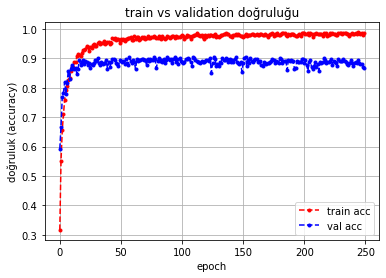

In [79]:
# Doğruluk (accuracy) fonksiyonu grafiği
plt.plot(results.history["accuracy"], "r.--", label = "train acc")
plt.plot(results.history["val_accuracy"], "b.--", label = "val acc")
plt.title("train vs validation doğruluğu")
plt.xlabel("epoch")
plt.ylabel("doğruluk (accuracy)")
plt.legend()
plt.grid(True)
plt.show()

### 6. Nöral ağın test edilmesi

In [80]:
net.evaluate(X_test, Y_test)

30/30 [==============================] - 0s 8ms/step - loss: 1.3493 - accuracy: 0.8734


[1.3493056297302246, 0.8733905553817749]

Bir örnek deneyelim:

In [97]:
num = int(input("0 ile 932 arasında bir sayı girin: "))
tahmin_sonucu = net.predict(X_test[num].reshape(1, 64, 64, 1))
print(f"%{tahmin_sonucu.max()*100} ihtimalle {tahmin_sonucu.argmax()} sınıfına ait bir spektrogram.")

0 ile 932 arasında bir sayı girin: 0
%99.99873638153076 ihtimalle 5 sınıfına ait bir spektrogram.


Sınıf: 1


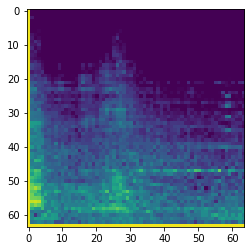

In [88]:
plt.imshow(X_test[num])
print(f"Sınıf: {Y_test[num]}")

### 6.1 Confusion matrisi

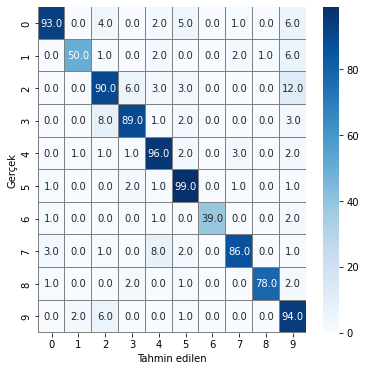

In [108]:
y_predicted = net.predict(X_test) # Nöral ağ tüm X_test değerlerini tahmin ediyor
y_predicted_class = np.argmax(y_predicted, axis = 1) # İhtimal listesindeki en yüksek ihtimali seçiyoruz
matrix = confusion_matrix(Y_test, y_predicted_class) # Karıştırma matrisini oluşturuyoruz

f,ax = plt.subplots(figsize=(6, 6))
sn.heatmap(matrix, annot=True, linewidths=0.01, cmap="Blues", linecolor="gray", fmt= '.1f', ax=ax)
plt.xlabel("Tahmin edilen")
plt.ylabel("Gerçek")
plt.show()

### 7. Sonuç

Baştan sona önişlediğimiz ve sonrasında içe aktardığımız veriyi kullanarak, sıfırdan oluşturduğumuz bir Konvülasyonel Nöral Ağı eğittik. Eğitim sırasında eğitim (train) ve doğrulama (validation) verisetleri üzerinde ortaya çıkan kayıp (loss) ve doğruluk (accuracy) metriklerini `matplotlib` ile plot ederek inceledik.

Eğittiğimiz modeli daha önce hiç görmediği `test` veriseti üzerinde test ettik ve `%88`'lik bir doğruluk elde ettik.

Son olarak kullanıcıdan alınan sayıya göre bir spektrogramı okuyan ve sınıfını tahmin eden kısmı ekledik.

AIYard ekibi

- Ferit Yiğit BALABAN
- Sıla Neval YAVUZ
- Günnur ŞENTÜRK
- Şeyma NURDAĞ
- Mehmet Ali ERCAN